In [1]:
import sqlite3

In [2]:
conn= sqlite3.connect('INSTRUCTOR.db')

In [3]:
cursor_obj = conn.cursor()

In [4]:
cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")

In [21]:
table =""" create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20),CITY VARCHAR(20), CCODE CHAR(2));"""
cursor_obj.execute(table)
print("Table is Ready")

Table is Ready


In [11]:
cursor_obj.execute('''insert into INSTRUCTOR values(1,'RAV','AHUJA','TORONTO','CA')''')

In [12]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)
print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

All the data
(1, 'RAV', 'AHUJA', 'TORONTO', 'CA')


In [13]:
## Fetch few rows from the table
statement = '''SELECT* FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
# If you want to fetch few rows from the table we use fetchmany(numberofrows) and mention the number how many rows you want to fetch
output_many= cursor_obj.fetchmany(2)
for row_many in output_many:
  print(row_many)

All the data
(1, 'RAV', 'AHUJA', 'TORONTO', 'CA')


In [15]:
#Fetch First name from the table
statement =''' SELECT FNAME FROM INSTRUCTOR'''
cursor_obj.execute(statement)
output_column = cursor_obj.fetchall()
for fetch in output_column:
  print(fetch)

('RAV',)


In [19]:
query_update='''update INSTRUCTOR set CITY='MOOSETOWN' where FNAME="RAV" '''
cursor_obj.execute(query_update)

In [20]:
statement = '''SELECT* FROM INSTRUCTOR'''
cursor_obj.execute(statement)
output = cursor_obj.fetchmany(2)
for row in output:
  print(row)

(1, 'RAV', 'AHUJA', 'MOOSETOWN', 'CA')


##**RETRIEVE DATA INTO PANDAS**

In [22]:
import pandas as pd
df = pd.read_sql_query("select * from instructor;", conn)
#print the dataframe
df


,ID,FNAME,LNAME,cCITY,CCODE
0,1,RAV,AHUJA,MOOSETOWN,CA


In [23]:
#printjust the LNAME for first row in the pandas data frame
df.LNAME[0]

'AHUJA'

In [24]:
df.shape

(1, 5)

In [25]:
#close the connection
conn.close()

##IMPORT ibm_db (imb Data base) using python library (optional)

In [27]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 kB 37.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.7/613.7 kB 62.8 MB/s eta 0:00:00
  Created wheel for ibm_db: filename=ibm_db-3.1.0-cp310-cp310-linux_x86_64.whl size=41729488 sha256=82d00935f34056afd030ad1f3b10c3bd565fa0077fb882df0d6d2245416dc8c7
  Stored in directory: /root/.cache/pip/wheels/50/d7/3d/cf01ca490baa2f299aca0c791a2a5708d9b9676608374e2f31
  Created wheel for ibm_db_sa: filename=ibm_db_sa-0.3.3-py3-none-any.whl size=27425 sha256=7b2b2237ccbaebe9159348fe98c21cde9fa6f4015f5700975a46dc45c62cc1e6
  Stored in d

In [32]:
!pip install sqlalchemy==1.3.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 62.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1268256 sha256=ee91a9f101610bc7a4b8423ef55013f9517aa1f6ce5a0aa2eb7171f7879c4b6e
  Stored in directory: /root/.cache/pip/wheels/27/51/b3/3481e88d5a5ba95dd4aafedc9316774d941c4ba61cfb93add8
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.15
    Uninstalling SQLAlchemy-2.0.15:
      Successfully uninstalled SQLAlchemy-2.0.15


In [34]:
import ibm_db

In [35]:
dsn_hostname = "YourDb2Hostname" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "YourDb2Username"        # e.g. "abc12345"
dsn_pwd = "YoueDb2Password"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "YourPort"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

In [36]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=YourDb2Hostname;PORT=YourPort;PROTOCOL=TCPIP;UID=YourDb2Username;PWD=YoueDb2Password;SECURITY=SSL;


In [37]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Unable to connect:  [IBM][CLI Driver] SQL1337N  The service "YourPort" was not found. SQLCODE=-1337


In [38]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

Exception: ignored

In [39]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

Exception: ignored

##Accessing Databases with SQL Magic

In [44]:
import csv, sqlite3
con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [46]:
%reload_ext sql


In [47]:
%sql sqlite:///SQLiteMagic.db

In [48]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * sqlite:///SQLiteMagic.db
Done.
99 rows affected.


[]

In [50]:
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = "Canada"

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [56]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite:///SQLiteMagic.db
Done.


Test_Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


Converting Query Result to DataFrames

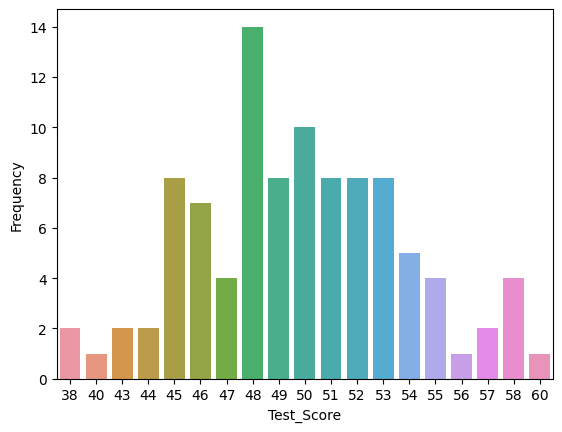

In [57]:
dataframe = test_score_distribution.DataFrame()
%matplotlib inline
import seaborn
plot = seaborn.barplot(x='Test_Score',y='Frequency', data=dataframe)

In [58]:
%%sql
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


##Analyzing a real world data-set with SQL and Python

In [59]:
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [60]:
import csv, sqlite3
con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()


In [61]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
%sql sqlite:///socioeconomic.db

In [63]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data",con, if_exists='replace',index =False,method="multi")


78

In [64]:
%sql SELECT* FROM chicago_socioeconomic_data limit 5;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [65]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [66]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index>50

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [67]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [69]:
%sql SELECT ca FROM chicago_socioeconomic_data WHERE hardship_index=98.0

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


ca
54.0


In [74]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [77]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
(sqlite3.OperationalError) near "FETCH": syntax error
[SQL: SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [76]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [78]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [80]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


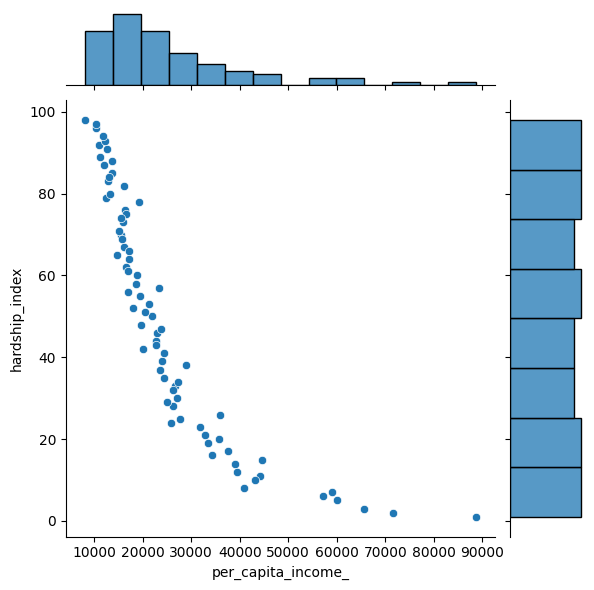

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Working with a real world data-set using SQL and Python

In [90]:
import csv,sqlite3
con = sqlite3.connect("RealWorldData.db")
cur = con.cursor()

In [91]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [93]:
%sql sqlite:///RealWorldData.db


In [94]:
import pandas
df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv")
df.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False, method="multi")

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv")
df.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")

566

In [95]:
%sql SELECT name FROM sqlite_master WHERE typw='table'

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such column: typw
[SQL: SELECT name FROM sqlite_master WHERE typw='table']
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [96]:
%sql SELECT count(name) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


count(name)
78


In [97]:
%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


name,type,length(type)
School_ID,INTEGER,7
NAME_OF_SCHOOL,TEXT,4
"Elementary, Middle, or High School",TEXT,4
Street_Address,TEXT,4
City,TEXT,4
State,TEXT,4
ZIP_Code,INTEGER,7
Phone_Number,TEXT,4
Link,TEXT,4
Network_Manager,TEXT,4


In [99]:
%sql SELECT count(*) FROM CHICAGO_PUBLIC_SCHOOLS_DATA where "Elementary,Middle,or High School" ='ES'

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


count(*)
0


In [100]:
%sql select count(*) from CHICAGO_PUBLIC_SCHOOLS_DATA where "Elementary, Middle, or High School"='ES'

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


count(*)
462


In [101]:
%sql select MAX(Saftey_Score) AS MAX_SAFTEY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS_DATA

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such column: Saftey_Score
[SQL: select MAX(Saftey_Score) AS MAX_SAFTEY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS_DATA]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [102]:
%sql select MAX(Safety_Score) AS MAX_SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS_DATA

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


MAX_SAFETY_SCORE
99.0


In [109]:
%sql select Name_of_School, Average_Student_Attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by Average_Student_Attendance desc nulls last limit 10 


 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


In [110]:
%sql SELECT Name_of_School, Average_Student_Attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by Average_Student_Attendance LIMIT 5

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
Velma F Thomas Early Childhood Center,None
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%


In [111]:

%sql SELECT Name_of_School, REPLACE(Average_Student_Attendance, '%', '') \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     order by Average_Student_Attendance \
     LIMIT 5

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,"REPLACE(Average_Student_Attendance, '%' , '' )"
Velma F Thomas Early Childhood Center,None
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00


In [113]:
%sql SELECT Name_of_School from CHICAGO_PUBLIC_SCHOOLS_DATA WHERE Average_Student_Attendance <70\
order by Average_Student_Attendance

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL
Richard T Crane Technical Preparatory High School
Barbara Vick Early Childhood & Family Center
Dyett High School
Wendell Phillips Academy High School
Orr Academy High School
Manley Career Academy High School
Chicago Vocational Career Academy High School
Roberto Clemente Community Academy High School


In [114]:
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name 

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


In [115]:
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name \
   order by TOTAL_ENROLLMENT asc \
   LIMIT 5 

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


In [116]:
%sql SELECT name_of_school, safety_score \
FROM CHICAGO_PUBLIC_SCHOOLS_DATA  where safety_score !='None' \
ORDER BY safety_score \
LIMIT 5

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,SAFETY_SCORE
Edmond Burke Elementary School,1.0
Luke O'Toole Elementary School,5.0
George W Tilton Elementary School,6.0
Foster Park Elementary School,11.0
Emil G Hirsch Metropolitan High School,13.0


In [117]:
%%sql 
select hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number 
and college_enrollment = 4368

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


HARDSHIP_INDEX
6.0


In [118]:
%sql select community_area_number, community_area_name, hardship_index from CENSUS_DATA \
   where community_area_number in \
   ( select community_area_number from CHICAGO_PUBLIC_SCHOOLS_DATA order by college_enrollment desc limit 1 )

 * sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
   sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,HARDSHIP_INDEX
5.0,North Center,6.0
